In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
import os

base_dir = '/content/drive/My Drive/SanitizeML'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_sanitized_dir = os.path.join(train_dir, 'sanitized')  # directory with our training sanitized
train_not_sanitized_dir = os.path.join(train_dir, 'not_sanitized')  # directory with our training not sanitized
validation_sanitized_dir = os.path.join(validation_dir, 'sanitized')  # directory with our validation sanitized
validation_not_sanitized_dir = os.path.join(validation_dir, 'not_sanitized')  # directory with our validation not sanitized

In [ ]:
num_sanitized_tr = len(os.listdir(train_sanitized_dir))
num_not_sanitized_tr = len(os.listdir(train_not_sanitized_dir))

num_sanitized_val = len(os.listdir(validation_sanitized_dir))
num_not_sanitized_val = len(os.listdir(validation_not_sanitized_dir))

total_train = num_sanitized_tr + num_not_sanitized_tr
total_val = num_sanitized_val + num_not_sanitized_val

In [ ]:
print('total training sanitized images:', num_sanitized_tr)
print('total training not sanitized images:', num_not_sanitized_tr)

print('total validation sanitized images:', num_sanitized_val)
print('total validation not sanitized images:', num_not_sanitized_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training sanitized images: 30
total training not sanitized images: 6
total validation sanitized images: 11
total validation not sanitized images: 6
--
Total training images: 36
Total validation images: 17


In [ ]:
BATCH_SIZE = 100
IMG_SHAPE  = 224 # Our training data consists of images with width of 224 pixels and height of 224 pixels to match with mobile net

URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMG_SHAPE, IMG_SHAPE, 3))
feature_extractor.trainable = False

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 36 images belonging to 2 classes.


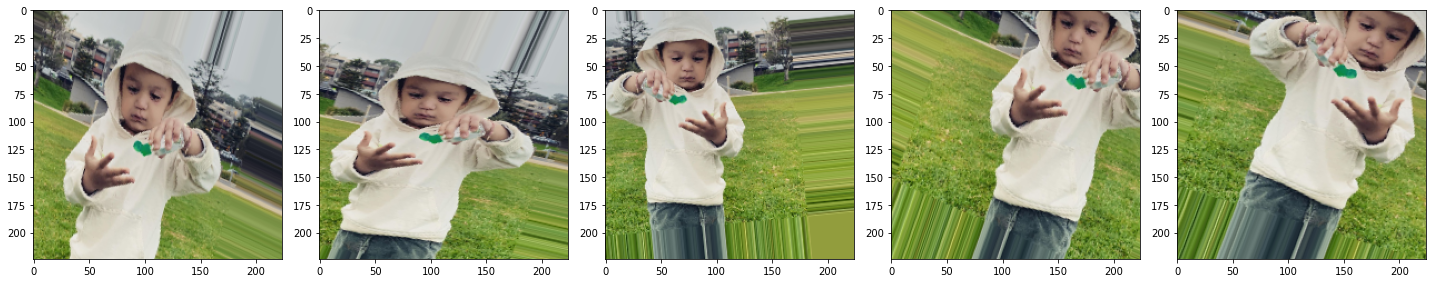

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 17 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([

    # tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    # tf.keras.layers.MaxPooling2D(2, 2),

    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),

    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),

    # tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),

    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),

    # tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(512, activation='relu'),

    feature_extractor,
    tf.keras.layers.Dense(2)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=22
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/22
1/1 [==============================] - 7s 7s/step - loss: 0.9930 - accuracy: 0.3611 - val_loss: 0.6410 - val_accuracy: 0.7059
Epoch 2/22
1/1 [==============================] - 6s 6s/step - loss: 0.5629 - accuracy: 0.7500 - val_loss: 0.7753 - val_accuracy: 0.7059
Epoch 3/22
1/1 [==============================] - 6s 6s/step - loss: 0.5449 - accuracy: 0.7778 - val_loss: 0.9100 - val_accuracy: 0.6471
Epoch 4/22
1/1 [==============================] - 6s 6s/step - loss: 0.5360 - accuracy: 0.8056 - val_loss: 0.9679 - val_accuracy: 0.6471
Epoch 5/22
1/1 [==============================] - 6s 6s/step - loss: 0.5487 - accuracy: 0.8333 - val_loss: 0.9561 - val_accuracy: 0.6471
Epoch 6/22
1/1 [==============================] - 6s 6s/step - loss: 0.4572 - accuracy: 0.8333 - val_loss: 0.8895 - val_accuracy: 0.6471
Epoch 7/22
1/1 [==============================] - 6s 6s/step - loss: 0.5276 - accuracy: 0.8333 - val_loss: 0.7832 - val_accuracy: 0.6471
Epoch 8/22
1/1 [=========================

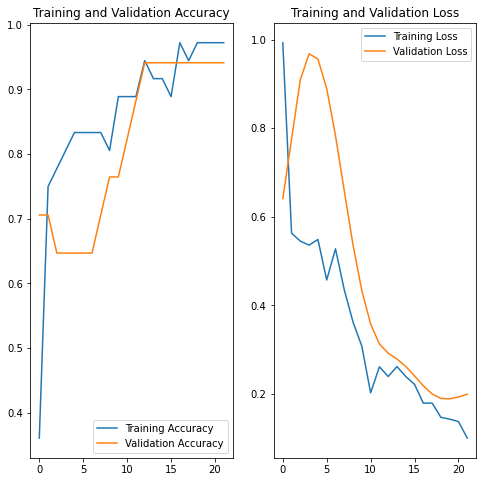

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

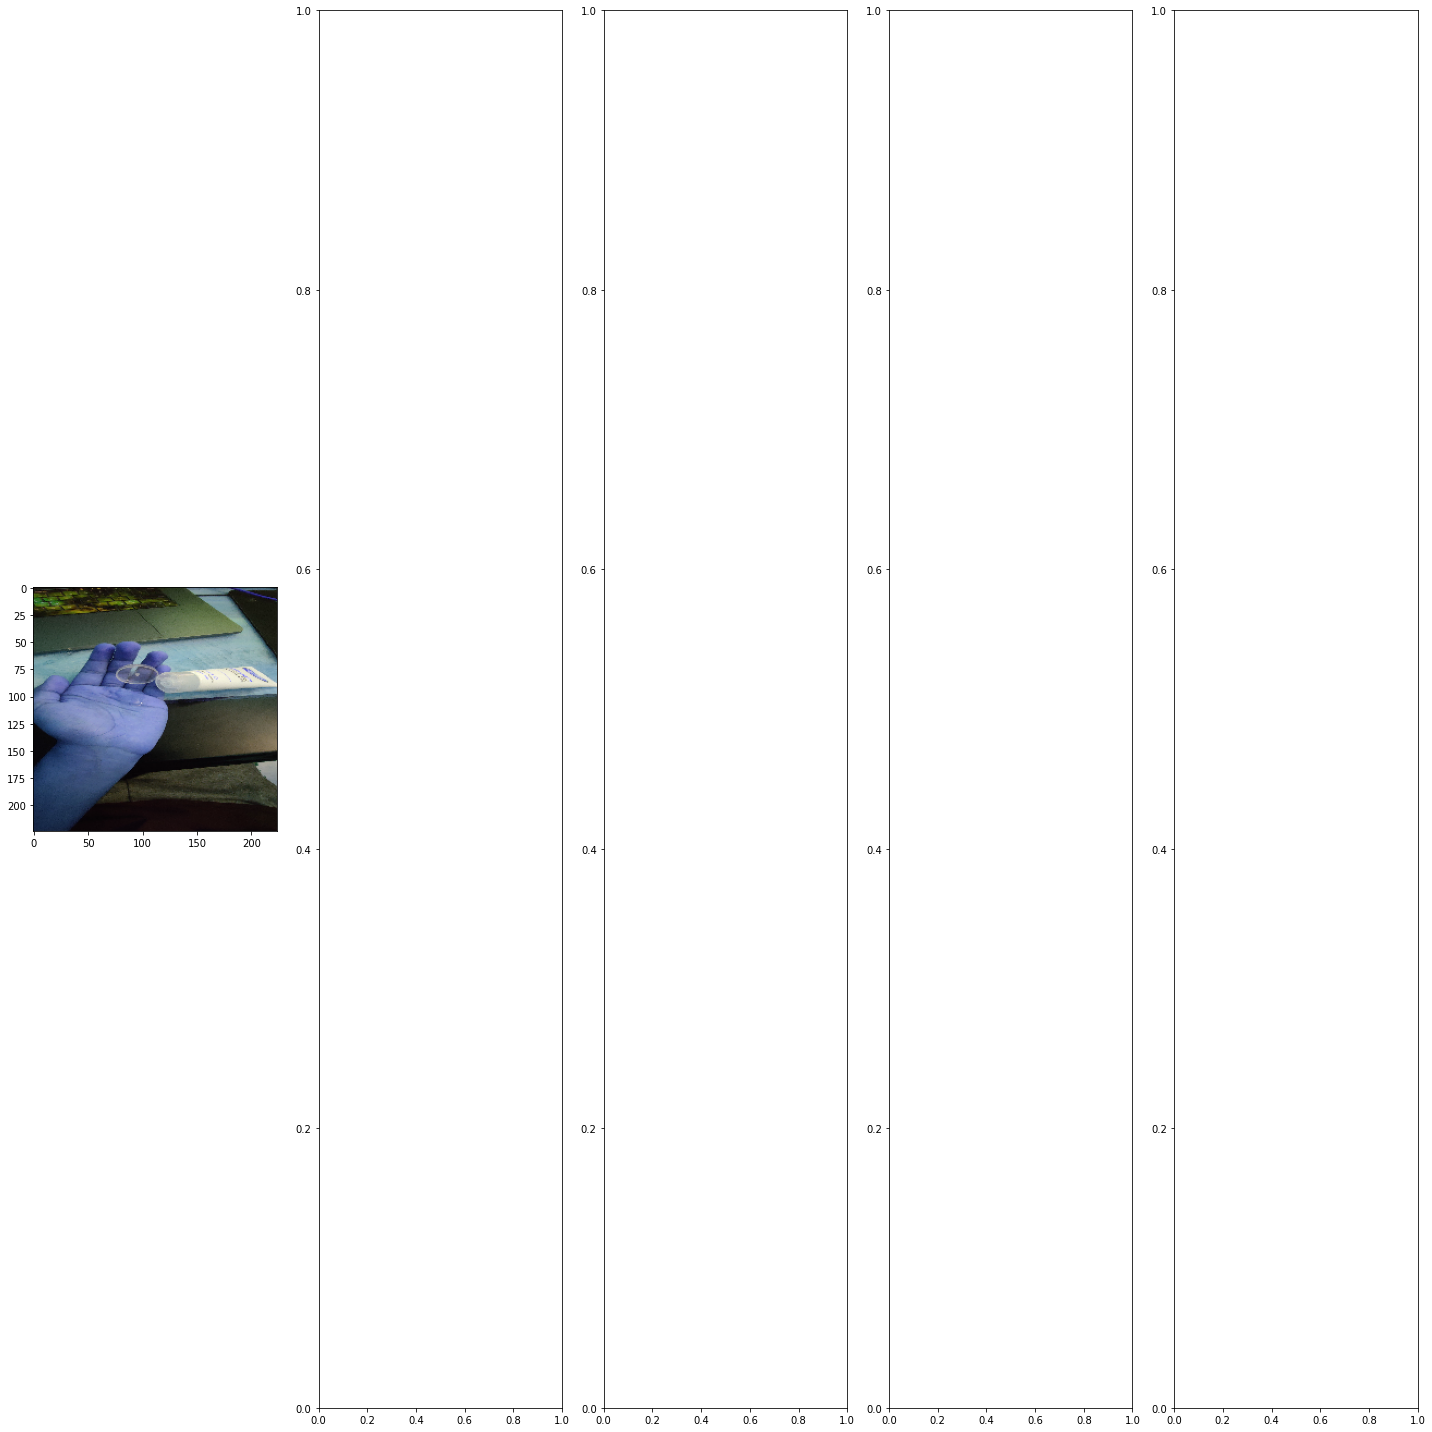

not_sanitized


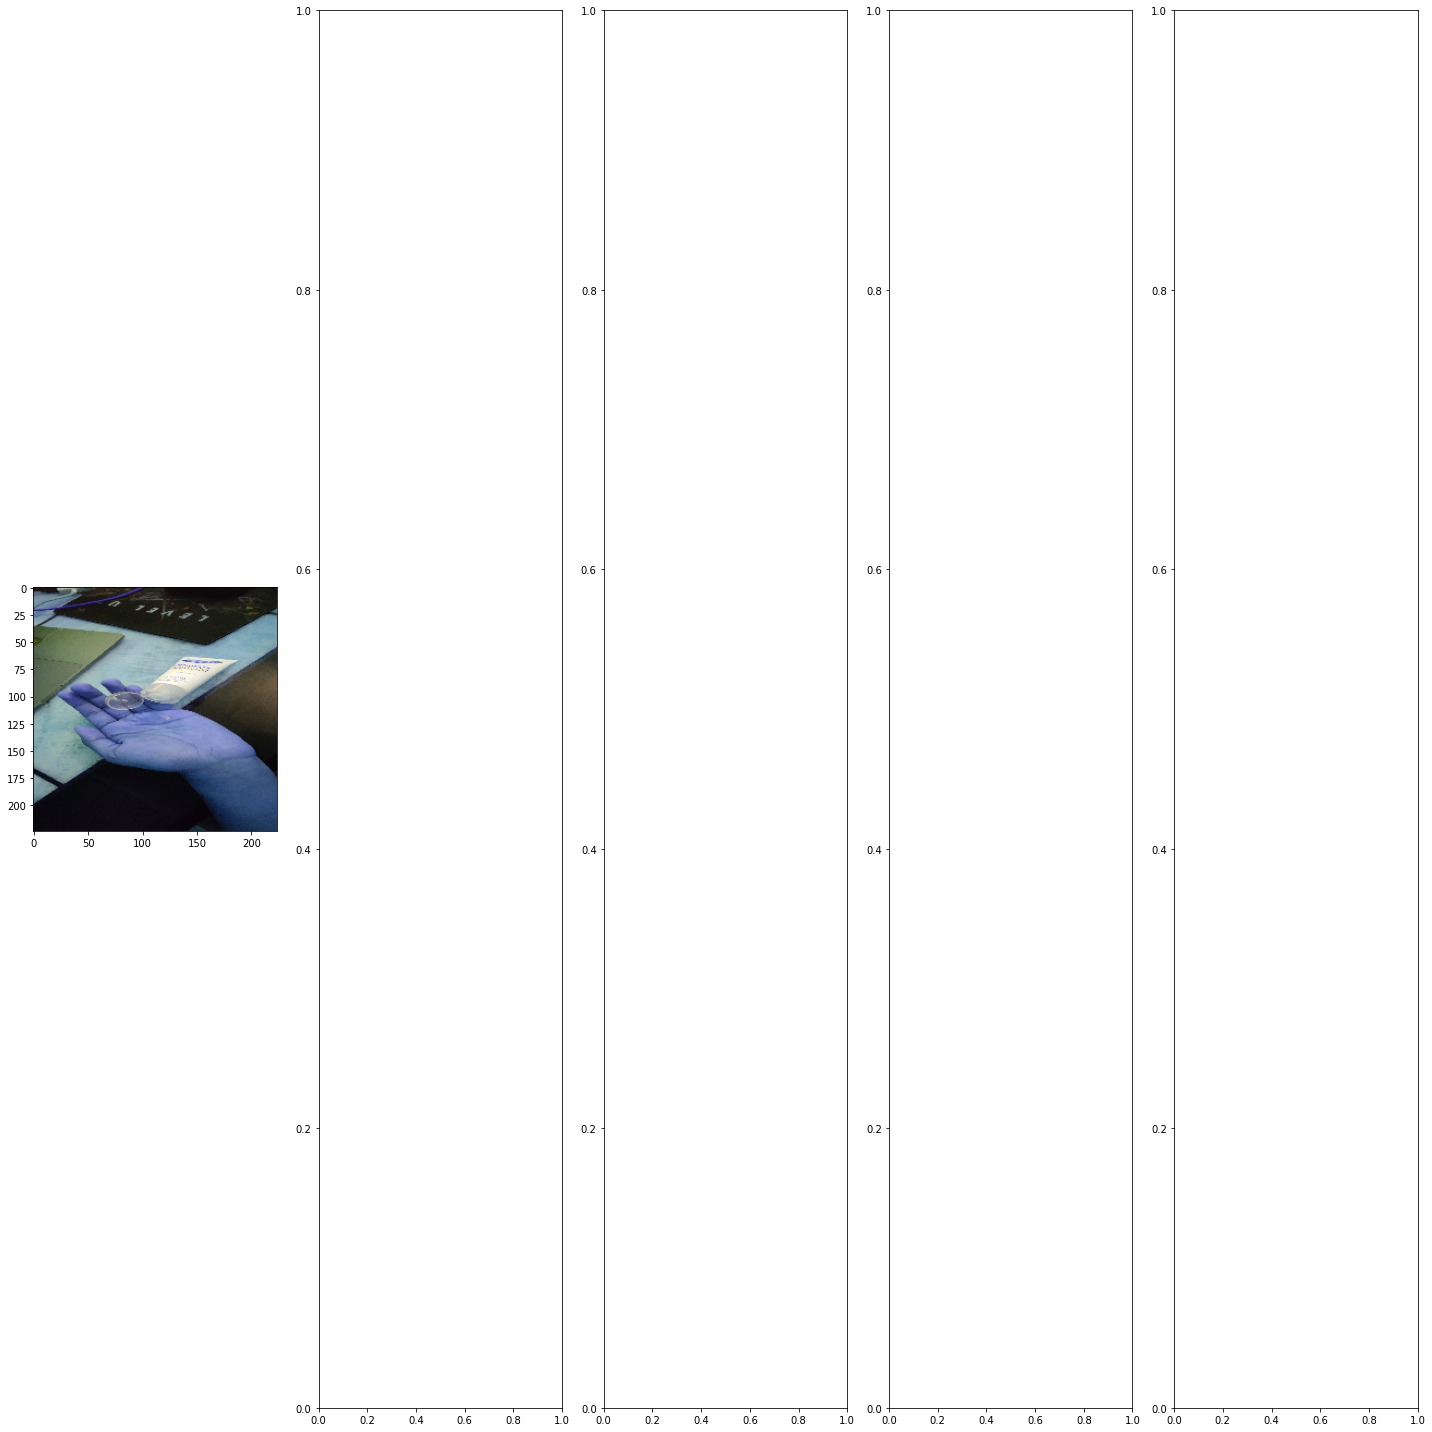

not_sanitized


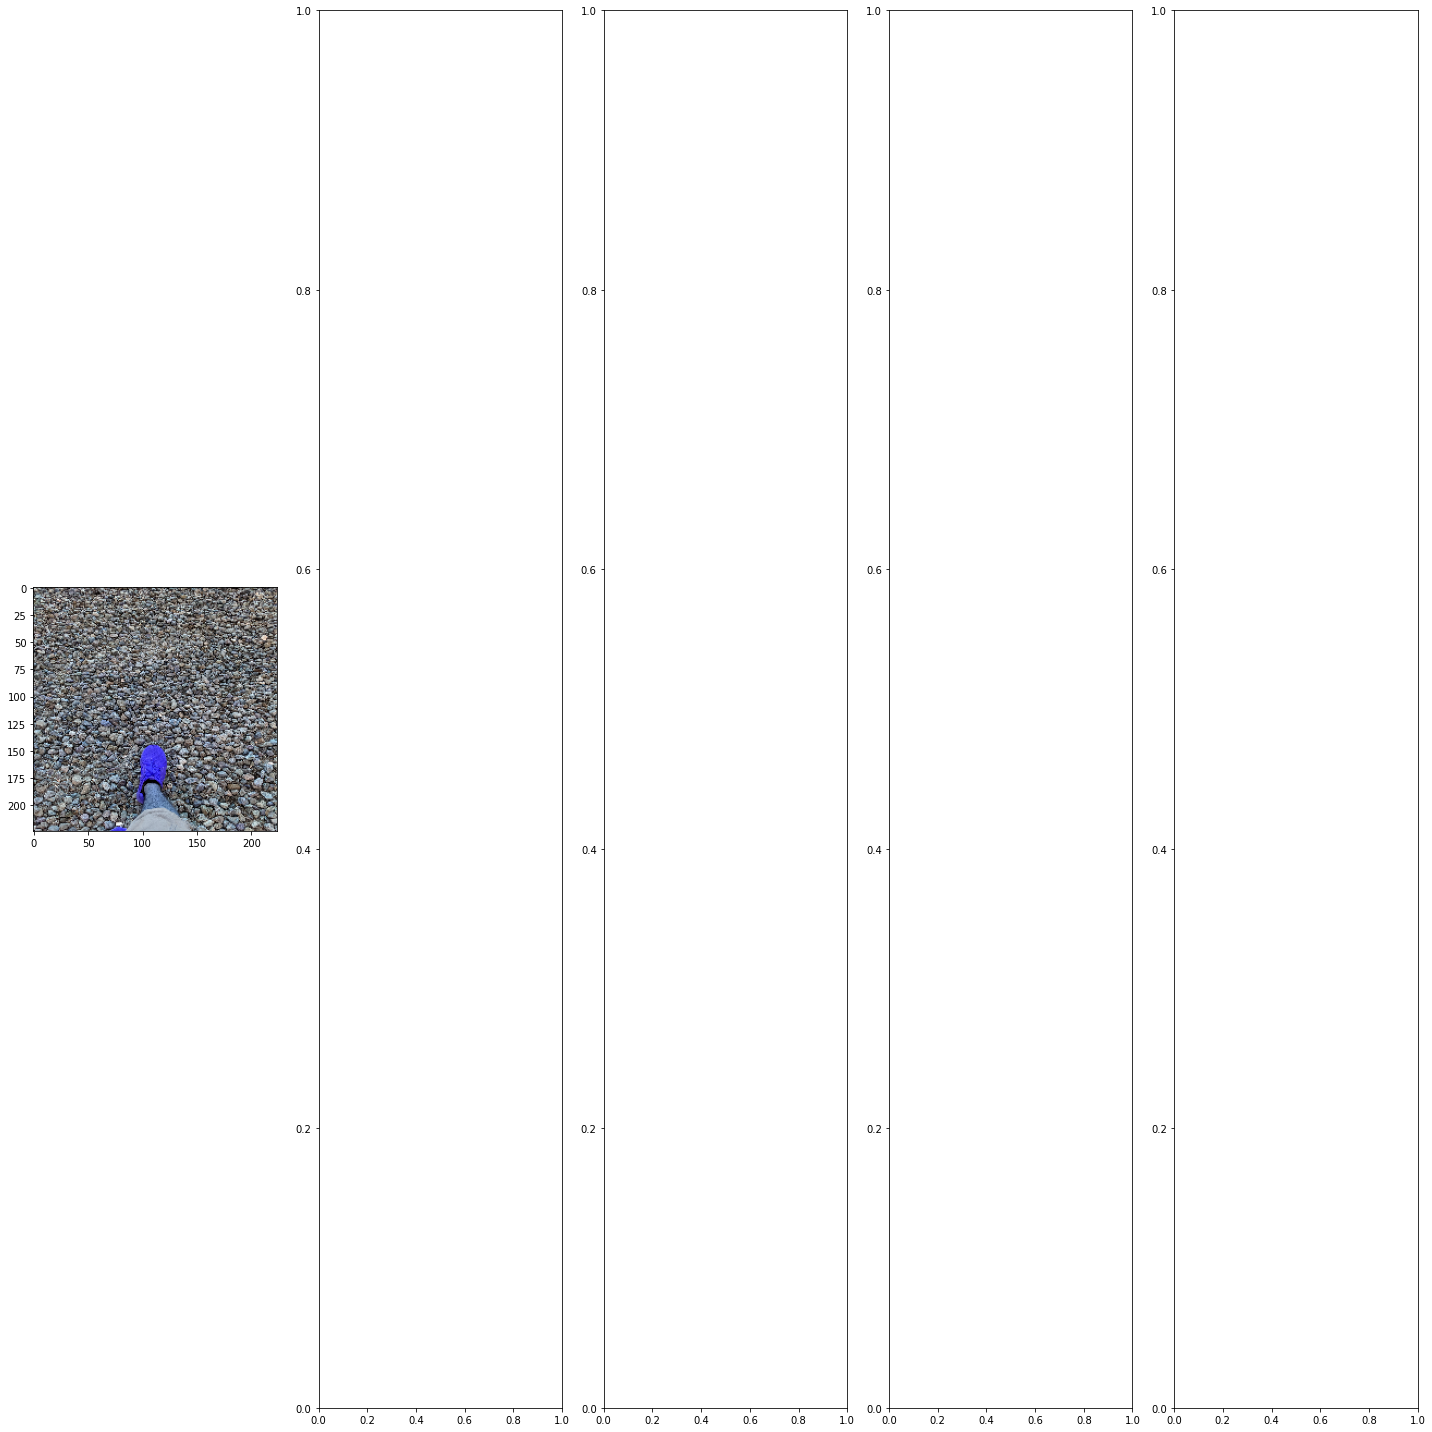

sanitized


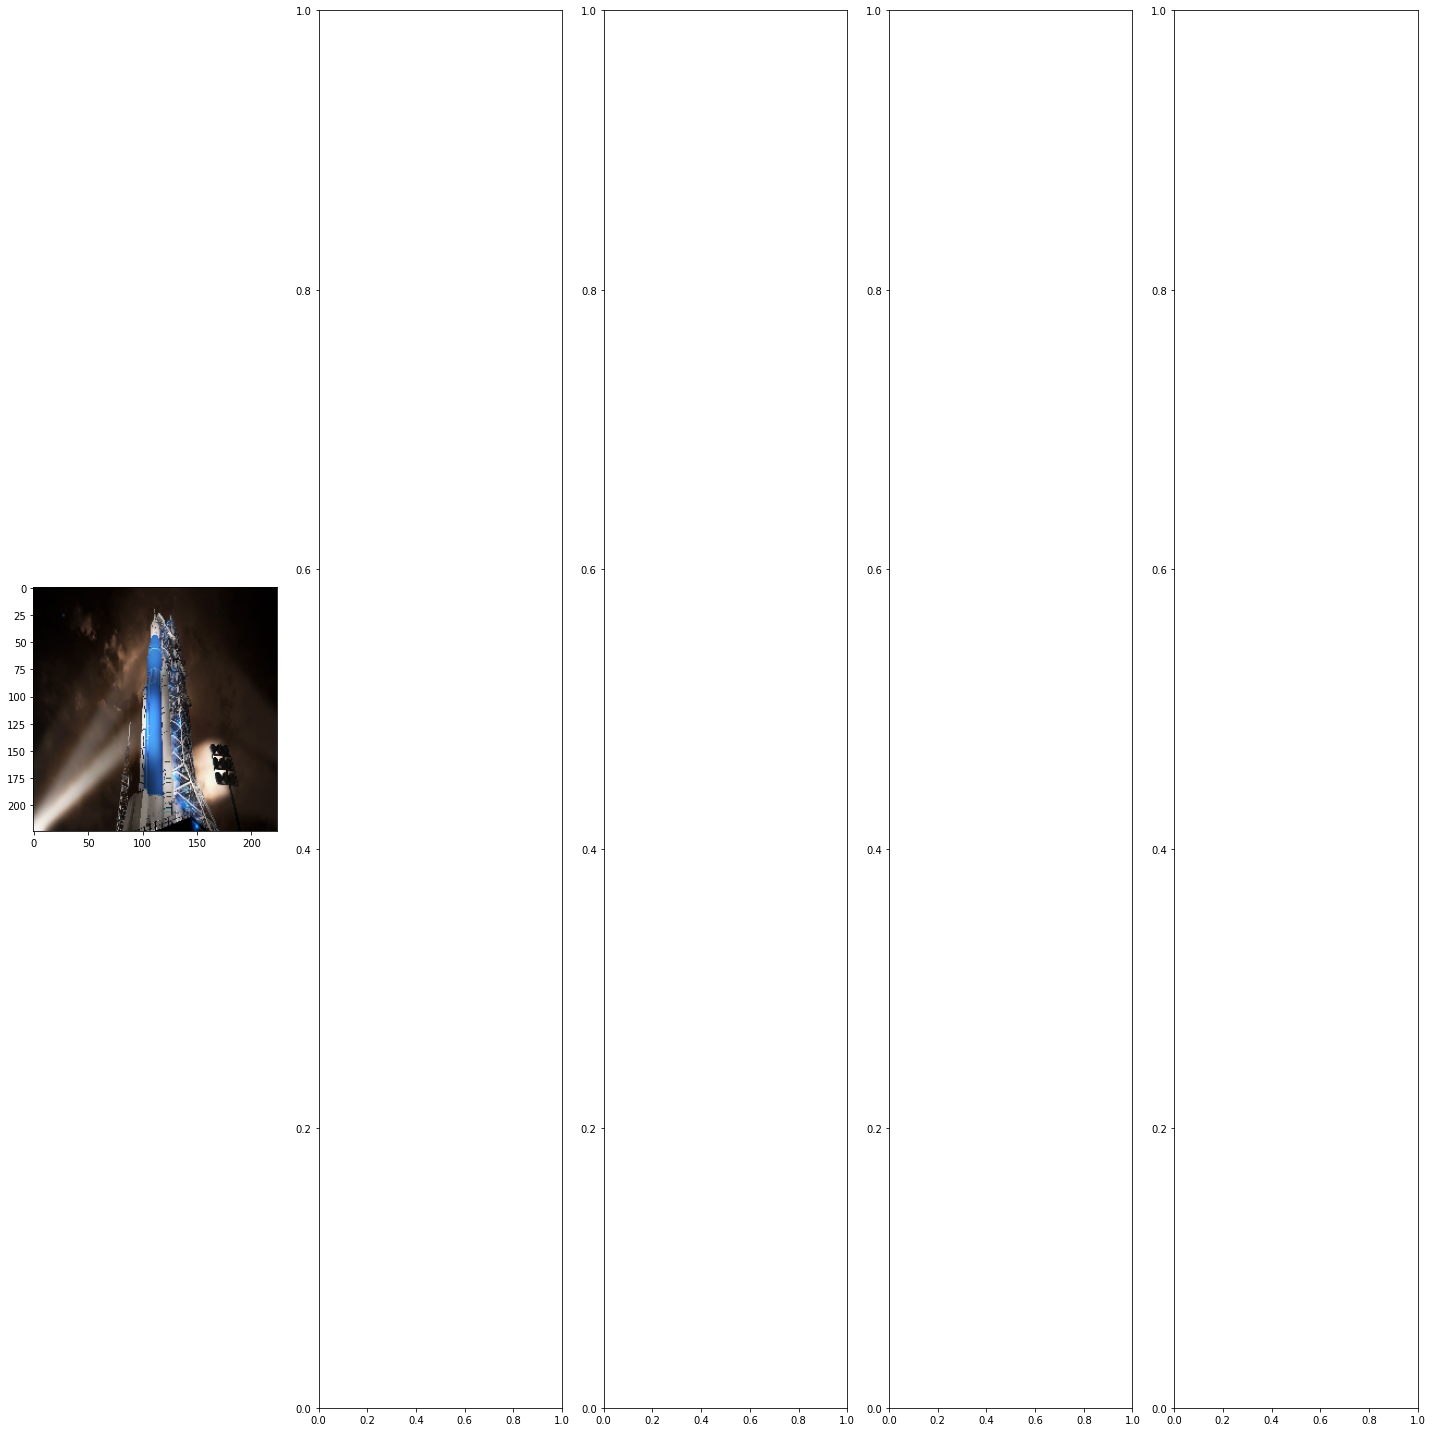

not_sanitized


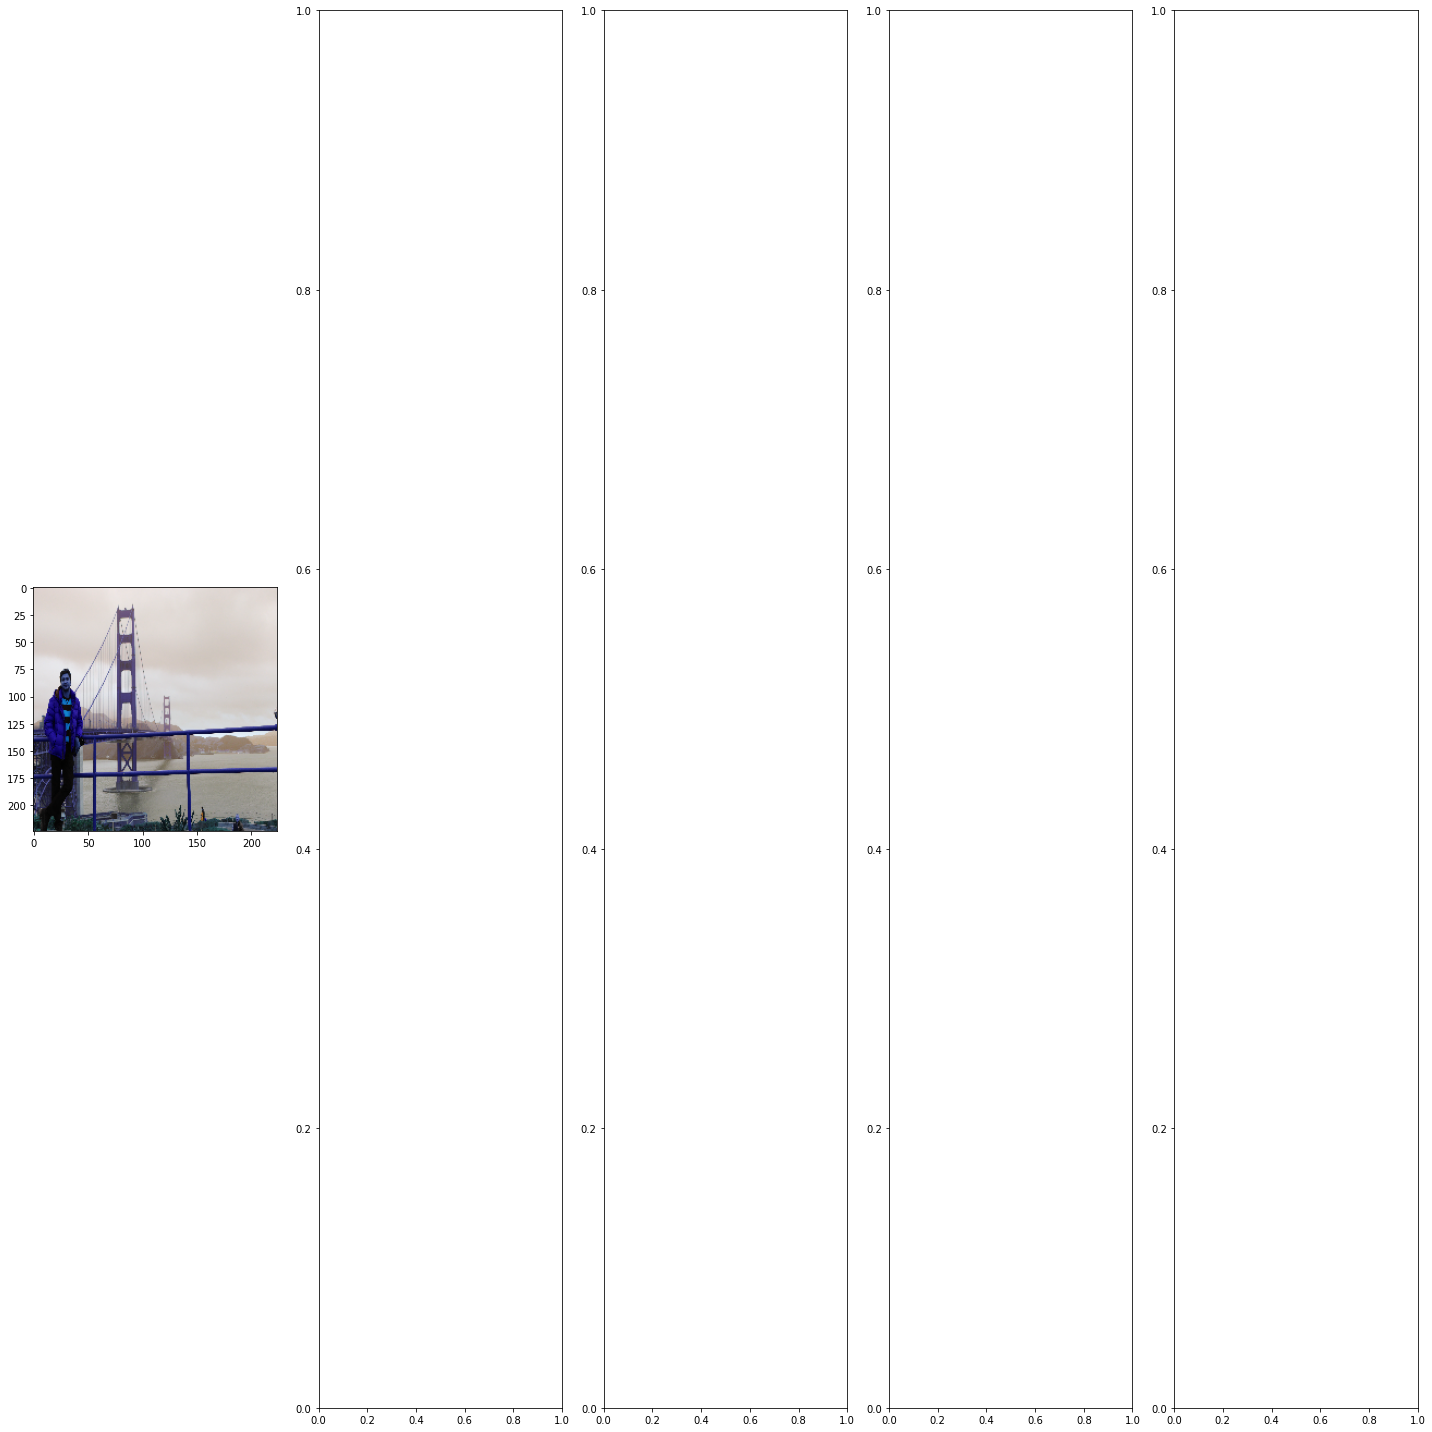

not_sanitized


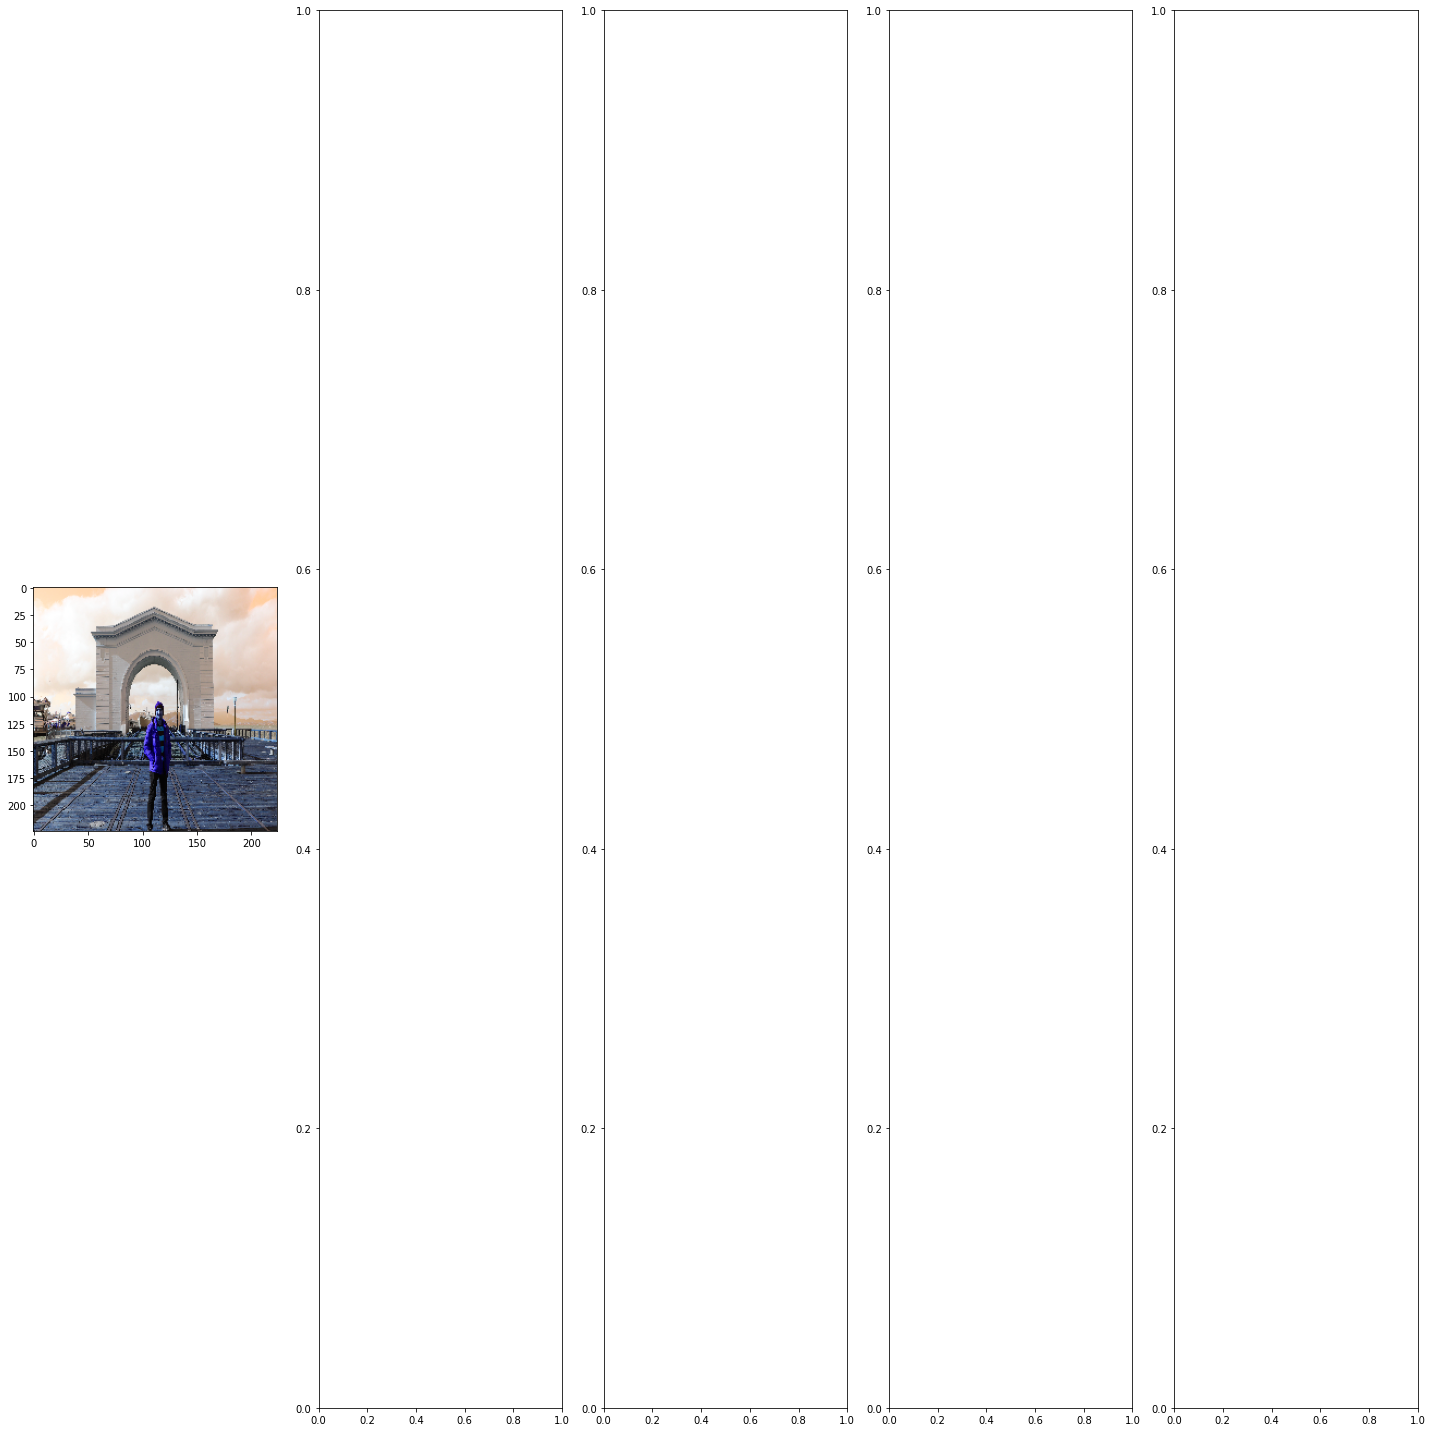

sanitized


In [ ]:
import cv2
classes_label = ['not_sanitized', 'sanitized']
for i in range(1, 7):
  test_dir = os.path.join(base_dir, 'test')
  image_path = os.path.join(test_dir, '{}.jpg'.format(i))
  img = cv2.imread(image_path)
  img = cv2.resize(img, (IMG_SHAPE, IMG_SHAPE))
  plotImages([img])
  img = np.reshape(img, [1, IMG_SHAPE, IMG_SHAPE, 3])
  classes = model.predict_classes(img)  
  print(classes_label[classes[0]])